In [3]:
#using DifferentialEquations
using Plots
using Statistics
using FFTW
FFTW.set_provider!("mkl")
#import Pkg; Pkg.add("FileIO")
using FileIO
using JLD2
using Base.Threads
using Distributions
#Pkg; Pkg.add("DistributedArrays")
println("nthreads = $(nthreads())")
using Printf
#import Pkg; Pkg.add("IJuliaBell")
using IJuliaBell

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1662


nthreads = 1


┌ Info: Precompiling IJuliaBell [3da9888e-9443-4cad-add1-2f3772a855ed]
└ @ Base loading.jl:1662
┌ Warning: Module IJulia with build ID 1561860055466873 is missing from the cache.
│ This may mean IJulia [7073ff75-c697-5162-941a-fcdaad2a7d2a] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1325
┌ Info: Skipping precompilation since __precompile__(false). Importing IJuliaBell [3da9888e-9443-4cad-add1-2f3772a855ed].
└ @ Base loading.jl:1341


## 2D PIC Escheleton 

Here we run the 2D version of PIC. 

In [2]:
include("aux_functions/aux_functions.jl")
include("aux_functions/inidat_aux_functions.jl")


f_x

### Initial Distribution

## Initial data configurations (Particles first)

In [25]:
## initial data configurations

trys = false
thermal = false
#trys = true
thermal = true



true

In [49]:
if trys 
    run_name = "try_"
    data_name = "par_dis_norel_thermal_"
    J = (100,100)
    Box = (0.0, 2.0, 0.0, 1.0)
    nm = [1,1]
    data_name = data_name * "nm_[$(nm[1]),$(nm[2])]_"
    run_name = run_name * "Box_$(Box[2]-Box[1])x$(Box[4]-Box[3])_J_$(J[1])x$(J[2])_nm_[$(nm[1]),$(nm[2])]_"
elseif thermal
    run_name = "thermal_norel_"
    data_name = "par_dis_norel_thermal_"
    J = (100,100)
    Box = (0.0, 2.0, 0.0, 1.0)
    nm = [1,1]
    data_name = data_name * "nm_[$(nm[1]),$(nm[2])]_"
    run_name = run_name * "Box_$(Box[2]-Box[1])x$(Box[4]-Box[3])_J_$(J[1])x$(J[2])_nm_[$(nm[1]),$(nm[2])]_"
end

D = length(J)
order = 5

# For Landau perturbations
exp_alpha = 8 #8 for not perturbation
α = 10.0^(-exp_alpha)

# Particle numbers
N_exp = 5 #6
N = 10^(N_exp)

# Temperature
exp_Theta = 3
θ = 10.0^(-exp_Theta)

@show data_name = data_name * "alp$(exp_alpha)_N$(N_exp)_Th$(exp_Theta)"

# Evolution parameters
exp_t = 1 #2
t = 0.0
t_i = 0.0
t_f = 10.0^(exp_t)
M = 1001 #16001# 4001 # 81 # 2001 # time steps 
M_g = 101 #8001 #400 + 1 #number of outputs, starting from the initial data
dx = differentials(Box,J)
@show dx_max = maximum(dx)
@show dt = (t_f-t_i)/(M-1)


# for plotting and other things
x_p = [dx[1]*(i-1) for i in 1:J[1]] ;
y_p = [dx[2]*(i-1) for i in 1:J[2]] ;



@show par_evolv = (t_i, t_f, M, M_g, dt)
@show par_grid = (N, J, Box, order)
@show pars_f = (θ,)
par_init = (α, nm)


println("t_f = $(t_f), M = $M, dt = $(dt), exp_Theta = $(exp_Theta)")



run_name = run_name * "tf_$(convert(Int,t_f))_N$(N_exp)_M$(M)_o$(order)_Th$(exp_Theta)_alp$(exp_alpha)"
println(run_name)
println(data_name)


data_name = data_name * "alp$(exp_alpha)_N$(N_exp)_Th$(exp_Theta)" = "par_dis_norel_thermal_nm_[1,1]_alp8_N5_Th3"
dx_max = maximum(dx) = 0.02
dt = (t_f - t_i) / (M - 1) = 0.01
par_evolv = (t_i, t_f, M, M_g, dt) = (0.0, 10.0, 1001, 101, 0.01)
par_grid = (N, J, Box, order) = (100000, (100, 100), (0.0, 2.0, 0.0, 1.0), 5)
pars_f = (θ,) = (0.001,)
t_f = 10.0, M = 1001, dt = 0.01, exp_Theta = 3
thermal_norel_Box_2.0x1.0_J_100x100_nm_[1,1]_tf_10_N5_M1001_o5_Th3_alp8
par_dis_norel_thermal_nm_[1,1]_alp8_N5_Th3


In [35]:
par_dis, run_name, pars, par_f_x, Box_x, par_f_p, Box_p = retrieve_initial_data_D("Initial_Distributions/" * data_name * ".jld2")
@show data_name_from_inidat, pars, par_f_x, Box_x, par_f_p, Box_p

(data_name_from_inidat, pars, par_f_x, Box_x, par_f_p, Box_p) = ("par_dis_norel_thermal_nm_[1,1]_alp8_N5_Th3", (100000,), (1.0e-8, [1, 1], (0.0, 40.0, 0.0, 40.0)), (0.0, 40.0, 0.0, 40.0), (0.001, 2), (-0.14177446878757827, 0.14177446878757827, -0.14177446878757827, 0.14177446878757827))


("par_dis_norel_thermal_nm_[1,1]_alp8_N5_Th3", (100000,), (1.0e-8, [1, 1], (0.0, 40.0, 0.0, 40.0)), (0.0, 40.0, 0.0, 40.0), (0.001, 2), (-0.14177446878757827, 0.14177446878757827, -0.14177446878757827, 0.14177446878757827))

### Check Density

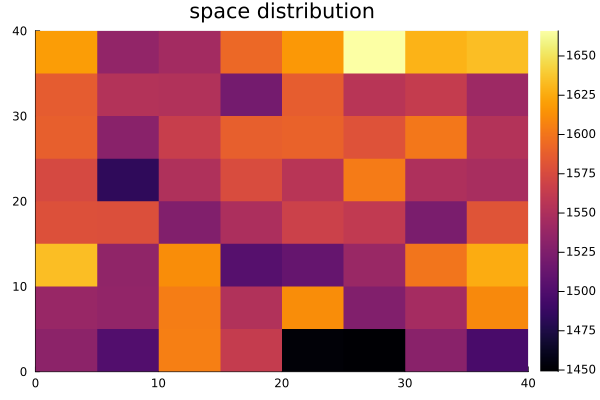

In [36]:
plot(histogram2d(par_dis[1:2D:end],par_dis[2:2D:end], title="space distribution" ))

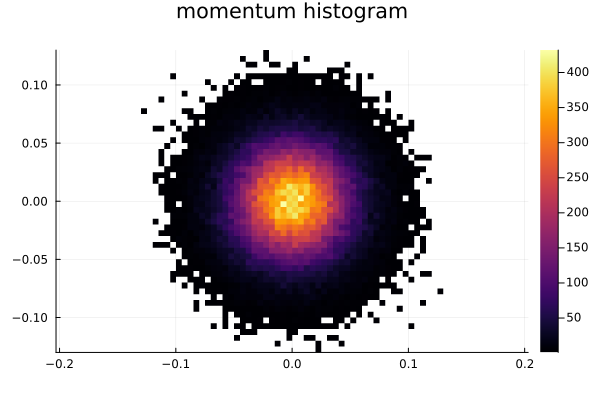

In [37]:
plot(histogram2d(par_dis[3:4:end],par_dis[4:4:end] )
,aspectratio=1
,title = "momentum histogram"
)

In [38]:
T = get_temperature_rel_D(par_dis,N,D)

0.000995232260281349

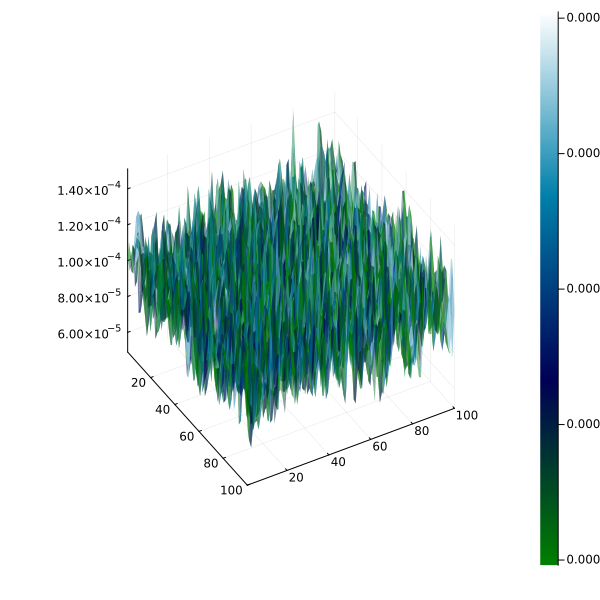

In [39]:
J = (100,100)
par_grid = (N, Box_x, J, 5)
n = zeros(J[1],J[2])

get_density_2D!(par_dis, n, par_grid, 0.0)

plot_matrix(n)

### Check Temperature

In [ ]:
#plot(n[:,5])

### Check Normalization

In [40]:
sum(n)

1.0

### Check Current

In [46]:
par_grid = (N, J, Box, 5)
S = [0.0::Float64 for l in 1:2, i in 1:J[1], j in 1:J[2]]
TS = zeros(Float64,(nthreads(),2,J...))

par_current_threads_S = (par_grid, TS)

get_current_threads_2D!(par_dis, S, par_current_threads_S)
S[1,3,4]

8.95488609604883e-8

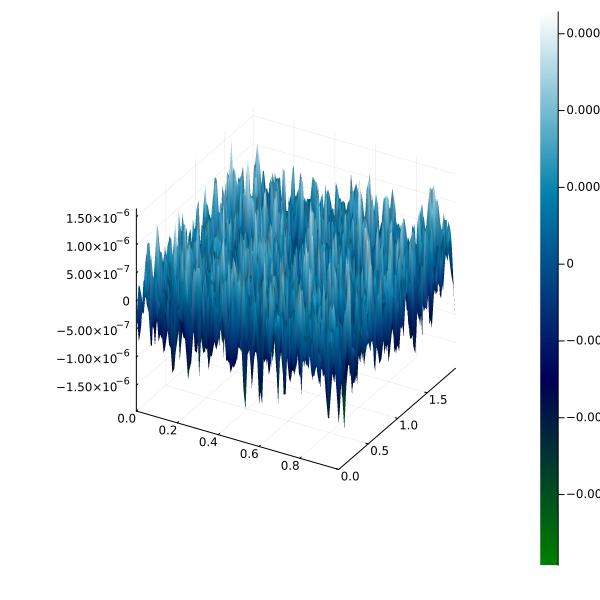

In [50]:
surface(y_p,x_p, S[1,:,:])

## Electric and Magnetic initial data

In [51]:
# We prescrive a constant magnetic field and the E is just a solution from Poisson's equations. 

B0 = 1.0 #initial magnetic field

B = [B0 for i in 1:J[1], j in 1:J[2]]

run_name = run_name * "B0_$(convert(Int,B0))_"

"thermal_norel_Box_2.0x1.0_J_100x100_nm_[1,1]_tf_10_N5_M1001_o5_Th3_alp8B0_1_"

In [58]:
E = Array{Float64,3}(undef,(2,J...))
ρ = n.-1.0/prod(J)
@show sum(ρ)
get_E!(E,ρ,Box);

sum(ρ) = 2.862293735361732e-17


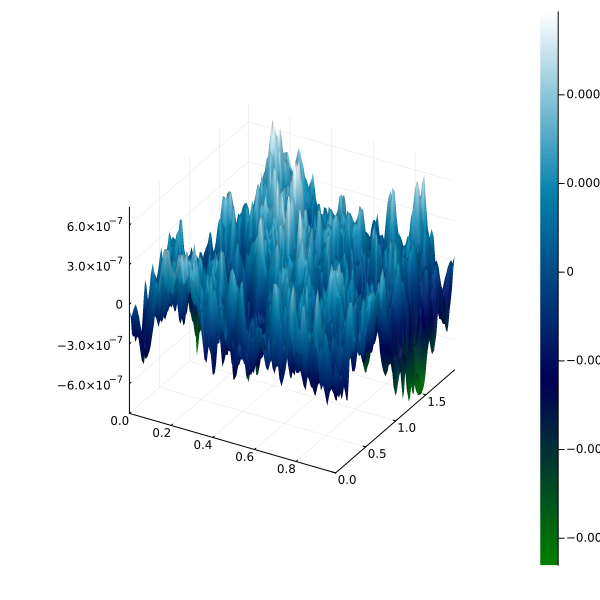

In [59]:
surface(y_p,x_p, E[2,:,:])

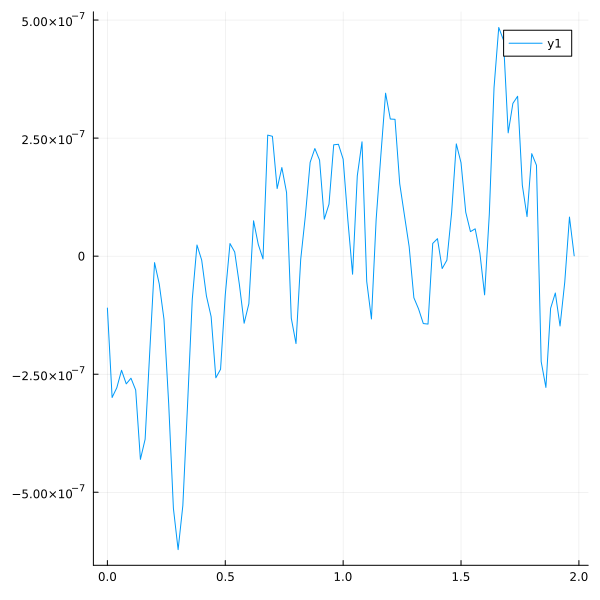

In [60]:
plot(x_p, E[1,:,50])

In [61]:
average_outputs = false # detailed output (for runs which are too long)
full_outputs = false
animation = false # to run animations
phase_space_show = false #show phase space diagrams
#phase_space_show = true
remote_server = false # if run in remote_server as a script avoid all plots 
save_plots = false # put true is you want so save your plots.
full_outputs = true

true

We build the initial data:

In [83]:
u = Vector{Float64}(undef, 4N + 3*prod(J)); # contains r, v and E and B

du = Vector{Float64}(undef, 4N + 3*prod(J)); # contains r, v and E

u[1:4N] = par_dis 

Fu = view(u,4N+1:4N+3*prod(J))

F = reshape(Fu,3,J...)

#F = view(u[4N+1:end],3,J...)
F[1:2,:,:] = E
F[3,:,:] = B;

#u
#F[3,:,:]

In [84]:
u[4N+2*prod(J)+1:end]
#u[4N+1:end-prod(J)]

10000-element Vector{Float64}:
  1.0
 -1.4034058763048718e-7
 -1.2516890434039488e-7
  1.0
  3.9291600423385114e-8
 -9.036422119105565e-8
  1.0
  2.0976521158885955e-7
 -7.840361254884791e-10
  1.0
  1.781017440420559e-7
  6.72023786205326e-8
  1.0
  ⋮
 -2.3445556340235896e-7
 -2.665582566125851e-7
  1.0
 -3.0298388426933026e-7
 -1.8766092154565373e-7
  1.0
 -2.5372602765478916e-7
 -6.088328774963489e-8
  1.0
 -1.845504603648649e-7
  3.313557345966363e-8
  1.0

# up to here!

With the particle distribution we construct the initial data for the electric field. For that first we compute de density, using different types of particles (order).

### What follows are characterizations of the initial data properties.

In [ ]:
get_current_rel!(u, S, par_grid)

println(maximum(u[1:N]))
println(minimum(u[1:N]))

Coordinate_test(u[1:N],L)

println("n_total = $(sum(n .- 1.0))")
println("v_total = $(sum(u[N+1:2N]))")
println("E_total = $(sum(E_i))")

println("S_total = $(sum(S))")

Compute the initial density, potential and electric field.

In [ ]:
if !remote_server 
    plt = plot(layout=(2,2))
    plot!(subplot=1,x,n, title = "density", legend = :false)
    plot!(subplot=2,x,ϕ, title = "potential", legend = :false)
    plot!(subplot=3,x,E_i, title = "Electric Field", legend = :false)
    
    plot!(subplot=4,x,S, title = "Current", legend = :false)
end

In [ ]:
E_Fourier = rfft(u[2N+1:end])
Plots.scatter(abs.((E_Fourier)),xlim=(0,20))

In [ ]:
rfft(u[2N+1:end])[nm+1]

In [ ]:
n_Fourier = rfft(n.-1)
freqs_space = fftshift(fftfreq(J,1/dx))
#Plots.scatter(freqs_space,abs.(fftshift(n_Fourier)))
Plots.scatter(abs.(n_Fourier)[1:20])

Check the histograms for the initial positions and velocities.

In [ ]:
if !remote_server
    plot(layout=(2,2))
    histogram!(subplot=1,u[1:N], title = "density", legend = :false, bins = 300)
    histogram!(subplot=2,u[N+1:2*N], title = "velocity", legend = :false)

    histogram!(subplot=3,S, title = "current", legend = :false)
end

In [ ]:
T = get_temperature_rel(u,N)

In [ ]:
if phase_space_show
Plots.scatter(u[1:N],u[N+1:2N]
, thickness_scaling = 0.3
, markersize = 0.3
, title = "phase-space", legend =:false)
png(run_name * "initial-phase-space")
end

## TIME Evolution: 

Now we make the time evolution:

1. we define parameters and vectors where to upload data to study the time evolution: Kinetic Energy, Electric field Energy, Total Electric field, total velocity (momentum), total density, total charge current.

2. we save a vector with the particle phase space, this can be a lot of memory!

In [ ]:
if nthreads() > 1
TS = zeros(J, nthreads())
p_RHSC = (N, J, L, dx, order, n, S, du, get_density!, get_current_rel_threads!, Interpolate_2, TS) ;
else
p_RHSC = (N, J, L, dx, order, n, S, du, get_density!, get_current_rel!, Interpolate_2) ;
end


In [ ]:
t = 0.0
j = 1

run_pars = Dict("run_name" => run_name, "par_grid" => par_grid, "par_evolv" => par_evolv, "p_Ini" => pars_f)

if full_outputs
    run_name = run_name * "_full"
elseif average_outputs
    run_name = run_name * "_ave"
end

file_name = "Results/"* run_name * ".jld2"
#rm(file_name)




save(file_name, run_pars)

if false # solo para testear
file = jldopen(file_name, "r+")
close(file)
end

if full_outputs
    field_name = "u"
    tiempo = @sprintf("%05d", j)
    jldopen(file_name, "a+") do file
        file[field_name * "/u_$(tiempo)"] = u;
    end
end

if average_outputs
    load_averages(file_name, j, par_grid, pars_f)
end


In [ ]:

for k in 2:M
  RK4_Step!(RHSC_rel,u,t,dt,p_RHSC)
  global u = [make_periodic!(u[1:N],L); u[N+1:end]]
  #filter_constant!(u[2N+1:end])
  global t = t + dt
  if (k-1) % (M÷(M_g-1)) == 0
    local j = (k-1)÷(M÷(M_g-1))+1
    Energy_Ks, Energy_Es = get_energy_rel(u,(L, N, J))

    if average_outputs
      load_averages(file_name, j, par_grid, pars_f)
    end

    if full_outputs
        local tiempo = @sprintf("%05d", j)
        jldopen(file_name, "a+") do file
            file[field_name * "/u_$(tiempo)"] = u
      end
    end

    println("j = $j , t = $t, k = $k, nthreads = $(nthreads()), Energy = $(Energy_Ks + Energy_Es)")

    if animation
      par[j,:] = u[1:2N]
    end
  end
end

In [ ]:
#@bell sleep(3)
E_f = zeros(J)
#ϕ_f = zeros(J)
#n_f = zeros(J) #charge density
if Poisson
    get_density!(u, n, par_grid, 0.0)
    get_ϕ!(ϕ, n .- 1., κ)
    get_E_from_ϕ!(ϕ,E_f,dx)
end
if E_direct
    get_density!(u, n, par_grid, 0.5)
    get_E_direct!(E_f,-n .+ 1.0,par_grid)
end

plot(E_i, label="E_i")
plot!(E_f, label="E_f")
plot!(u[2N+1:end], ls=:dash, label="Dynamical E_f")
png("Images/" * run_name * "Constraint_preservation.png")

Saving the results

In [ ]:
if remote_server
    exit() #if running as script
end

In [ ]:
rfft(E_i)[nm+1]

## Studying the solutions: 

Post procesing is done in post_pro_landau_rel

### Energy:

34 peaks in T = 100, so $\omega = 0.34$

We save the data:

| time | order | energy | theta |
|------|-------|--------|-------|
|  40  |  1    | 7.4e-7 | 0.009978|
|  40  |  3    | 7.9e-8 | 0.009979 |
|  40  |  5    | 1.1e-7 | 0.009979 |
|  4000|  1    | 7.6e-5 | 0.009978 |
|  4000|  3    | 7.2e-6 | 0.010086 |
|  4000|  5    | 1.0e-5 | 0.010031 |
|  4e6 |  1    | 0.0360 | 0.010119 |
